# Case Study - Portfolio Optimization
In this case study, we will build two $10,000 investment portfolios containing three stocks. The *first portfolio* will have an *equal weighting between the stocks*. The *second portfolio* will then be optimized with a *weighting allocation* that provides the best return, adjusted for risk. To build these two portfolios, we will:

1. Import two years of data for three stocks.
2. Build the initial portfolio with equal weighting to each of the stocks.
3. Analyze and visualize the equally weighted portfolio.
4. Generate 10,000 portfolio scenarios with random weighting to each of the stocks.
5. Identify the optimal portfolio from the scenarios and visualize the results.

## Import Packages & Connect to Data

In [1]:
# Import packages needed for case study
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # matplotlib inline

In [2]:
# We fetch our data from yahoo finance
import yfinance as yf

In [3]:
# Creating a list for the three stock ticker symbols of 
# Oracle, Google, and Meta
stock_list = ['ORCL', 'GOOGL', 'META']

# Create dictionary to store stock data
stocks = {}

# Download 2 years of daily data for each stock
for ticker in stock_list:
    stocks[ticker] = yf.download(ticker, period="2y", auto_adjust=False)

    # stocks[ticker] = stocks[ticker].reset_index()
    if 'Adj Close' not in stocks[ticker].columns:
        stocks[ticker].rename(columns={'Close': 'Adj Close'}, inplace=True)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Examine the 'AMD' Adj Close from the stocks dictionary to confirm the data fetch correctly
stocks['META']

Price        Adj Close       Close        High         Low        Open  \
Ticker            META        META        META        META        META   
Date                                                                     
2023-10-17  322.014862  324.000000  324.399994  317.299988  318.179993   
2023-10-18  315.027924  316.970001  325.940002  315.559998  321.390015   
2023-10-19  310.893433  312.809998  321.890015  311.750000  319.880005   
2023-10-20  306.758942  308.649994  315.299988  306.470001  314.140015   
2023-10-23  312.086090  314.010010  317.359985  307.260010  309.500000   
...                ...         ...         ...         ...         ...   
2025-10-10  705.299988  705.299988  735.270020  704.510010  730.919983   
2025-10-13  715.700012  715.700012  719.940002  707.640015  713.010010   
2025-10-14  708.650024  708.650024  715.549988  699.330017  707.780029   
2025-10-15  717.549988  717.549988  723.900024  709.510010  717.059998   
2025-10-16  712.070007  712.070007  725.489990  703.880005  717.559998   

Price         Volume  
Ticker          META  
Date                  
2023-10-17  16387800  
2023-10-18  16851000  
2023-10-19  18709200  
2023-10-20  22312300  
2023-10-23  17796800  
...              ...  
2025-10-10  16980100  
2025-10-13   9251800  
2025-10-14   8829800  
2025-10-15  10246800  
2025-10-16   8807714  

[502 rows x 6 columns]

## Create the Equal-Weighted Portfolio
To create the equal-weighted portfolio, we need to add some additional columns to the DataFrames in the `stocks` dictionary. The three columns that we will build are:
* Normalized Return = *i*th Adjusted Close / Adjusted Close on the `startdate` of the portfolio
* Allocation = Normalized Return / 3 (equal weighting for each of the stocks)
* Position Value = Allocation * 10,000 (value of the portfolio)

In [5]:
# Create 'Normalized Return' column for each stock
for stock_name, stock_data in stocks.items():
    first_adj_close = stock_data.iloc[0]['Adj Close'] # Select the first row from the Adj Close column
    stock_data['Normalized Return'] = stock_data['Adj Close'] / first_adj_close

In [6]:
stocks['META'].head()

Price        Adj Close       Close        High         Low        Open  \
Ticker            META        META        META        META        META   
Date                                                                     
2023-10-17  322.014862  324.000000  324.399994  317.299988  318.179993   
2023-10-18  315.027924  316.970001  325.940002  315.559998  321.390015   
2023-10-19  310.893433  312.809998  321.890015  311.750000  319.880005   
2023-10-20  306.758942  308.649994  315.299988  306.470001  314.140015   
2023-10-23  312.086090  314.010010  317.359985  307.260010  309.500000   

Price         Volume Normalized Return  
Ticker          META                    
Date                                    
2023-10-17  16387800          1.000000  
2023-10-18  16851000          0.978302  
2023-10-19  18709200          0.965463  
2023-10-20  22312300          0.952624  
2023-10-23  17796800          0.969167

In [7]:
# Create allocation for each stock - equally weighted in our initial portfolio
for stock_name, stock_data in stocks.items():
    allocation = 1 / len(stock_list)
    stock_data['Allocation'] = stock_data['Normalized Return'] * allocation
    stock_data['Position Value'] = stock_data['Allocation'] * 10000

In [8]:
stocks['META'].head()

Price        Adj Close       Close        High         Low        Open  \
Ticker            META        META        META        META        META   
Date                                                                     
2023-10-17  322.014862  324.000000  324.399994  317.299988  318.179993   
2023-10-18  315.027924  316.970001  325.940002  315.559998  321.390015   
2023-10-19  310.893433  312.809998  321.890015  311.750000  319.880005   
2023-10-20  306.758942  308.649994  315.299988  306.470001  314.140015   
2023-10-23  312.086090  314.010010  317.359985  307.260010  309.500000   

Price         Volume Normalized Return Allocation Position Value  
Ticker          META                                              
Date                                                              
2023-10-17  16387800          1.000000   0.333333    3333.333333  
2023-10-18  16851000          0.978302   0.326101    3261.008116  
2023-10-19  18709200          0.965463   0.321821    3218.209978  
2023-10-20  22312300          0.952624   0.317541    3175.411840  
2023-10-23  17796800          0.969167   0.323056    3230.555759

## Visualize the Portfolio Performance
To visualize the performance of the portfolio, we can create two line charts that show the return of the portfolio, and the return of the individual stocks, over time. Let's build a new DataFrame that contains just the `position value` for each stock, as well as the total value for the portfolio. We can use this DataFrame to create the two visuals.

In [9]:
# Create position_values dictionary
position_values = {}

for stock_name, stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']

In [10]:
# Convert the position_values dictionary to a DataFrame
position_values = pd.DataFrame(data=position_values)

position_values.head()

ORCL        GOOGL         META
Date                                             
2023-10-17  3333.333333  3333.333333  3333.333333
2023-10-18  3309.183283  3291.344695  3261.008116
2023-10-19  3311.934760  3286.334414  3218.209978
2023-10-20  3113.536353  3235.041440  3175.411840
2023-10-23  3168.868218  3256.513182  3230.555759

In [11]:
# Add 'Total' column to position values, summing the other columns
position_values['Total'] = position_values.sum(axis=1)

In [12]:
position_values

ORCL        GOOGL         META         Total
Date                                                           
2023-10-17  3333.333333  3333.333333  3333.333333  10000.000000
2023-10-18  3309.183283  3291.344695  3261.008116   9861.536094
2023-10-19  3311.934760  3286.334414  3218.209978   9816.479151
2023-10-20  3113.536353  3235.041440  3175.411840   9523.989632
2023-10-23  3168.868218  3256.513182  3230.555759   9655.937158
...                 ...          ...          ...           ...
2025-10-10  9155.420363  5682.833573  7300.905133  22139.159069
2025-10-13  9625.755044  5864.918372  7408.560872  22899.234288
2025-10-14  9344.179302  5896.146765  7335.583001  22575.909067
2025-10-15  9488.560783  6030.188362  7427.710874  22946.460019
2025-10-16  9781.699403  6040.517920  7370.984916  23193.202239

[502 rows x 4 columns]

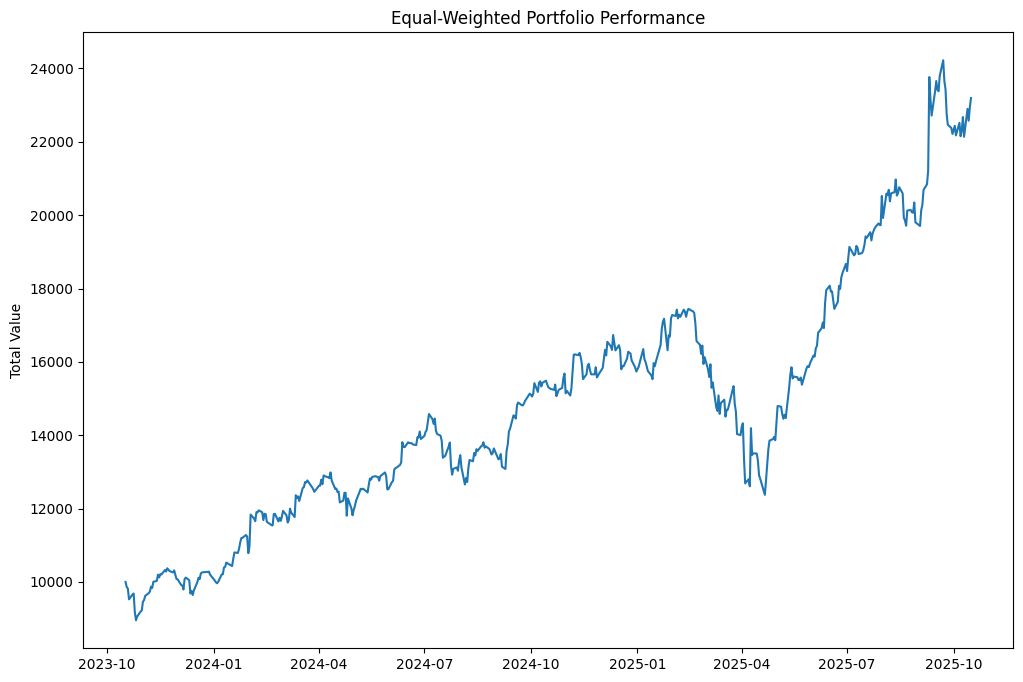

In [13]:
# View the total portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values['Total'])

plt.title('Equal-Weighted Portfolio Performance')
plt.ylabel('Total Value')
plt.show()

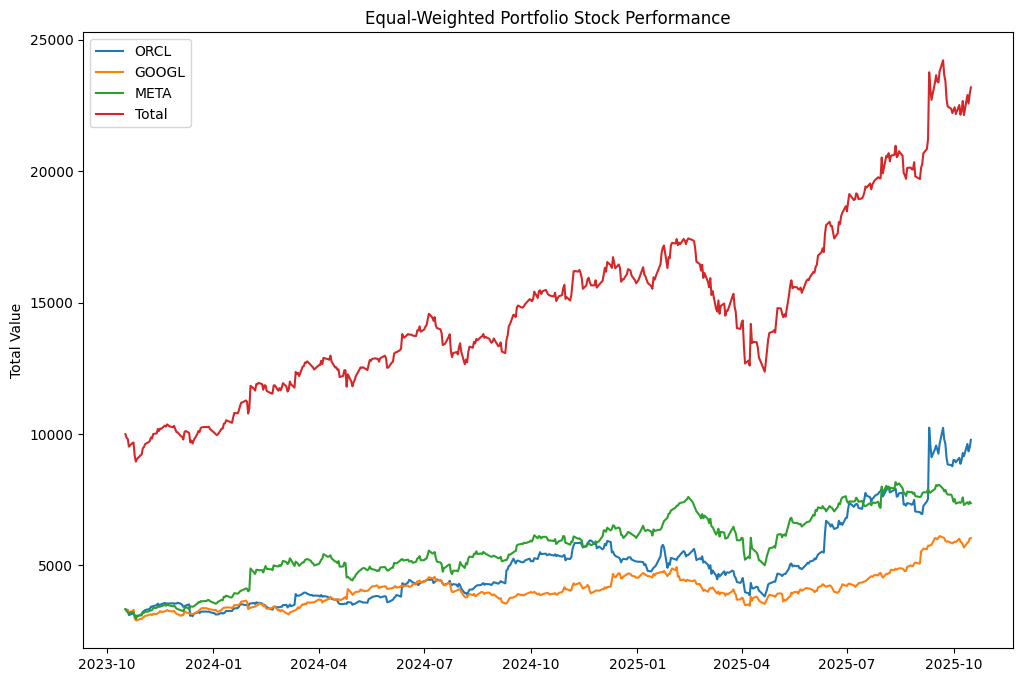

In [14]:
# View the stocks in the portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values.iloc[:,0:8])
plt.legend(position_values,loc="upper left", fontsize=10, frameon=True)

plt.title('Equal-Weighted Portfolio Stock Performance')
plt.ylabel('Total Value')
plt.show();

## Calculate Performance Metrics for the Portfolio
Now that we have created and visualized the equal-weighted portfolio, we can calculate a few metrics to further measure the performance of the portfolio. We will create five performances metrics:
 * Cumulative Return
 * Mean Daily Return
 * Standard Deviation Daily Return
 * Sharpe Ratio
 * Annualized Sharpe Ratio

In [15]:
# Define the end and start value of the portfolio
end_value = position_values['Total'].iloc[-1]
start_value = position_values['Total'].iloc[0]

In [16]:
# Calculate the cumulative portfolio return as a percentage
cumulative_return = end_value / start_value - 1

print('The cummulative return is', str(round(cumulative_return*100,2)), '%')

The cummulative return is 131.93 %


In [17]:
# Create a 'Daily Returns' column
position_values['Daily Return'] = position_values['Total'].pct_change().infer_objects(copy=False)

position_values.head()

ORCL        GOOGL         META         Total  Daily Return
Date                                                                         
2023-10-17  3333.333333  3333.333333  3333.333333  10000.000000           NaN
2023-10-18  3309.183283  3291.344695  3261.008116   9861.536094     -0.013846
2023-10-19  3311.934760  3286.334414  3218.209978   9816.479151     -0.004569
2023-10-20  3113.536353  3235.041440  3175.411840   9523.989632     -0.029796
2023-10-23  3168.868218  3256.513182  3230.555759   9655.937158      0.013854

In [18]:
# Calculate the mean Daily Return 
mean_daily_return = position_values['Daily Return'].mean()

print('The mean daily return is:', str(round(mean_daily_return, 4)))

The mean daily return is: 0.0018


In [19]:
# Calculate the standard deviation of Daily Return 
std_daily_return = position_values['Daily Return'].std()

print('The std daily return is:', str(round(std_daily_return, 4)))

The std daily return is: 0.0184


### Sharpe Ratio
Now, let's explore a risk-adjusted return metric called the sharpe ratio. The sharpe ratio helps us quantify how much return we are getting by a given level of risk. When comparing two different investments against the same benchmark, the asset with the higher Sharpe ratio provides a higher return for the same amount of risk or the same return for a lower risk than the other asset. 

It is calculated by the average return of the portfolio minus a risk-free rate (such as government bonds), divided by the standard deviation of the return. In this case, we assume the risk-free rate is close to zero, so we won't add it to the formula.

In [20]:
# Calculate the sharpe ratio
# 5% annual ≈ 0.000198 daily considering only 252 business days
risk_free_rate = 0.05 / 252   
sharpe_ratio = (mean_daily_return - risk_free_rate) / std_daily_return

print(sharpe_ratio)

0.08950820321602805


In [21]:
# zero risk free rate
sharpe_ratio_zrf = mean_daily_return / std_daily_return
print(sharpe_ratio_zrf)

0.10027282231087033


In [22]:
# Calculate the annualized sharpe ratio
sharpe_ratio_annualized = sharpe_ratio * 252 ** 0.5

print(sharpe_ratio_annualized)

1.4208986760590523


## 📈 Portfolio Performance Summary (Equal-Weighted Tech Stocks)

1. Equal-Weighted Portfolio

This first portfolio was constructed by allocating an equal share of the investment to each stock. Key steps included:

	•	Normalizing adjusted closing prices to track growth from a common starting point.
	•	Allocating weights equally across the three stocks (≈33.33% each).
	•	Computing portfolio position values and total value over time.

This provided a baseline for comparison, illustrating how an equally diversified portfolio evolves without optimization.

2. Performance Evaluation

The equal-weighted portfolio was evaluated using standard performance metrics:

	•	Cumulative Return: Overall portfolio growth relative to the starting value.
	•	Mean Daily Return: Average return per day.
	•	Volatility: Standard deviation of daily returns, representing risk.
	•	Sharpe Ratio: Risk-adjusted return, annualized by multiplying by √252.

In [23]:
print('Key Metrics: \n',
      'The cummulative return is', str(round(cumulative_return*100,2)),'% \n',
      'The mean daily return is:', str(round(mean_daily_return, 4)), '\n',
        'The std daily return is:', str(round(std_daily_return, 4)), '\n',
        'The sharpe ratio is:', str(round(sharpe_ratio, 4)), '\n',
        'Using zero risk free rate, the sharpe ratio is:', str(round(sharpe_ratio_zrf, 4)), '\n',
        'The annualized sharpe ratio is:', str(round(sharpe_ratio_annualized, 4)), '\n')

Key Metrics: 
 The cummulative return is 131.93 % 
 The mean daily return is: 0.0018 
 The std daily return is: 0.0184 
 The sharpe ratio is: 0.0895 
 Using zero risk free rate, the sharpe ratio is: 0.1003 
 The annualized sharpe ratio is: 1.4209 



These metrics quantify both profitability and risk exposure.

### Risk & Exposure

This analysis evaluates an equal-weighted investment strategy using historical data from three major technology companies: **Oracle, Google, and Meta**.

### 🔹 Key Metrics

- **Cumulative Return**: indicates the *portfolio growth over the investment period*.

- **Mean Daily Return**: indicates the *average daily gain* showing consistent growth.

- **Standard Deviation (Daily)**: Reflects relatively high *volatility* typical of tech stocks.

- **Sharpe Ratio (Raw)**: is the *risk-adjusted return*, assuming a non-zero risk-free rate. The Sharpe ratio tells you how much return you get per unit of risk. A low value suggests a modest return compared to the risk.

- **Sharpe Ratio (Zero Risk-Free Rate)**: is the *risk-adjusted return*, assuming a zero risk-free rate. Same idea as above, but assuming zero risk-free rate. Still similar performance.

- **Annualized Sharpe Ratio**: Indicates the **risk-adjusted return** (Sharpe > 1 is generally considered acceptable).

### 🧠 Interpretation

- The portfolio delivered **strong absolute returns** with **moderate-to-high volatility**.
- The **Sharpe ratio suggests decent compensation for risk**, making this equal-weighted approach a solid baseline.
- There's potential to improve results through more advanced portfolio optimization strategies

✅ This equal-weighted tech portfolio serves as a **good benchmark** for comparing more sophisticated strategies.

## Optimizing Portfolio Weighting using Monte Carlo Simulation
To identify an optimal allocation, we employed Monte Carlo simulation within the framework of Modern Portfolio Theory (MPT):

* Monte Carlo Simulation: 10,000 random portfolios are generated by assigning random weight combinations to the three stocks.
* For each simulated portfolio, expected annual return, volatility, and Sharpe ratio were computed.
* The process approximates the efficient frontier, that is, the set of portfolios that offer the highest return for a given level of risk.
* The portfolio with the maximum Sharpe ratio is the optimal allocation, representing the best risk-return trade-off.

### Preparing Scenarios
We need to prepare our data ahead of generating our scenarios to optimize the portfolio weighting. We will:
 * Create a dictionary containing the adjusted close for each of our stocks: stock_adj_close
 * Create another dictionary that transforms the adjusted close for each day to a percent change from the previous day.

In [24]:
# Create stock_adj_close dictionary
stock_adj_close = {}

stock_adj_close = pd.concat(
    {ticker: data['Adj Close'] for ticker, data in stocks.items()},
    axis=1)

In [25]:
# Convert the stock_adj_close dictionary to a DataFrame
stock_adj_close = pd.DataFrame(data = stock_adj_close)
stock_adj_close.columns = stock_adj_close.columns.droplevel(1)

# Ensure index is Date and sorted
stock_adj_close

ORCL       GOOGL        META
Date                                          
2023-10-17  106.661766  138.762939  322.014862
2023-10-18  105.889000  137.014999  315.027924
2023-10-19  105.977043  136.806427  310.893433
2023-10-20   99.628586  134.671158  306.758942
2023-10-23  101.399124  135.565002  312.086090
...                ...         ...         ...
2025-10-10  292.959991  236.570007  705.299988
2025-10-13  308.010010  244.149994  715.700012
2025-10-14  299.000000  245.449997  708.650024
2025-10-15  303.619995  251.029999  717.549988
2025-10-16  313.000000  251.460007  712.070007

[502 rows x 3 columns]

In [26]:
# Create stock_returns DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change()

stock_returns.head()

ORCL     GOOGL      META
Date                                    
2023-10-17       NaN       NaN       NaN
2023-10-18 -0.007245 -0.012597 -0.021698
2023-10-19  0.000831 -0.001522 -0.013124
2023-10-20 -0.059904 -0.015608 -0.013299
2023-10-23  0.017771  0.006637  0.017366

## Build & Run 10,000 Portfolio Scenarios
Now that we've prepared our data, we're almost ready to run our scenarios. First, we need to build the structures required to generate these scenarios and store the output. To do this, we will use the `numpy.zeros()` function. 

This function creates arrays that are filled with zeros. After we run the scenarios, we replace these zeros with the corresponding output. The reason we create the arrays with zeros first is to give our arrays the correct shape before we replace them with the correct values.

We will create four different arrays:
 * weights_array - this array will have 10,000 rows and 3 columns and hold the weighting allocation for each stock
 * returns_array - this array will contain the portfolio return for each scenario
 * volatility_array - this array will contain the portfolio volatility for each scenario
 * sharpe_array - this array will contain the sharpe ratio for each scenario

In [27]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000

weights_array = np.zeros((scenarios, len(stock_returns.columns)))

weights_array

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [28]:
# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [29]:
import random
random.seed(3)
np.random.seed(3)

for index in range(scenarios): 
    # Generate random numbers for each index
    numbers = np.array(np.random.random(len(stock_returns.columns)))
    
    # Divide each number by the sum of the numbers to generate the random weight
    weights = numbers / np.sum(numbers)
    
    # Save the weights in weights_array
    weights_array[index,:] = weights
    
    # Calculate the return for each scenario
    returns_array[index] = np.sum(stock_returns.mean()*252*weights)
    
    # Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))

    # Calculate the Sharpe Ratio for each scenario 
    sharpe_array[index] = returns_array[index] / volatility_array[index] if volatility_array[index] != 0 else 0

In [30]:
print("The first combination:", weights_array[0])

The first combination: [0.35538777 0.45691364 0.18769858]


In [31]:
print("The sharpe ratio of the first portfolio:", sharpe_array[0])

The sharpe ratio of the first portfolio: 1.6741529303872391


## Identify the Optimal Portfolio
Now that we have the output for all 10,000 scenarios, we can identify the optimal portfolio. The optimal portfolio in this case study is the portfolio that has the highest sharpe ratio.

In [32]:
# Find the highest sharpe ratio in sharpe_array
print(sharpe_array.max())

1.70750292887564


In [33]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
print(index_max_sharpe)

3280


In [34]:
# Print the optimal weights for each stock
print(stock_list)
print(weights_array[index_max_sharpe,:])

['ORCL', 'GOOGL', 'META']
[0.36145445 0.29338841 0.34515714]


## Visualize the Optimal Portfolio & Portfolio Scenarios
Let's visualize our portfolio scenarios. 

### 📊 Portfolio Weight Allocation (Pie Chart)

The chart below shows the proportion of capital allocated to each stock in the Monte Carlo optimized portfolio.

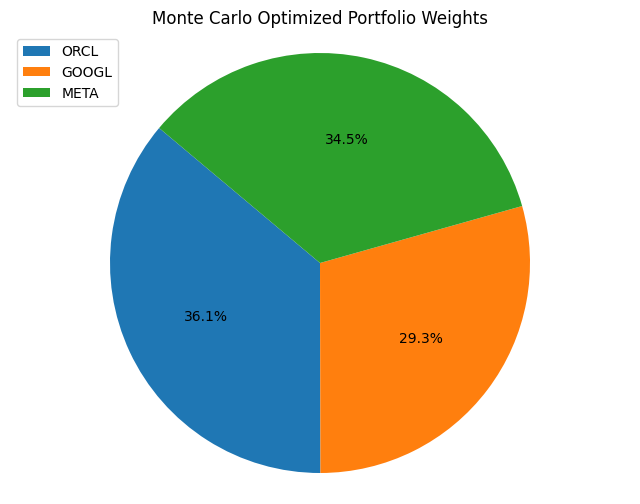

In [35]:
optimal_weights = weights_array[index_max_sharpe, :]

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(optimal_weights, autopct='%1.1f%%', startangle=140)
plt.legend(labels=stock_list, loc="upper left", fontsize=10)
plt.title('Monte Carlo Optimized Portfolio Weights')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Portfolio Visualization (scatter chart)
We use the volatility and returns arrays on each axis to see the relationship between risk and reward. As a final step, we visualize where the optimal portfolio appears among all of the scenarios.

In [36]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

max_sharpe_volatility = volatility_array[index_max_sharpe]
max_sharpe_return = returns_array[index_max_sharpe]

fig = px.scatter(
    x=volatility_array,
    y=returns_array,
    color=sharpe_array,
    color_continuous_scale='Viridis',
    labels={'x': 'Volatility (Risk)', 'y': 'Expected Return'},
    title="Portfolio Risk vs Return"
)

fig.add_scatter(
    x=[max_sharpe_volatility],
    y=[max_sharpe_return],
    mode='markers',
    marker=dict(color='red', size=12),
    name='Max Sharpe'
)

fig.update_coloraxes(colorbar_title="Sharpe Ratio")

fig.update_layout(
    template="plotly_white",
    title_x=0.5,
    font=dict(size=14),
    width=1000,
    height=700,
    coloraxis_colorbar=dict(
        title="Sharpe Ratio",
        len=0.9,         # shorten the colorbar (default is 1)
        y=0.5,           # center it vertically
        yanchor="middle" # anchor from the middle
    ),
    legend=dict(
        x=1.05, y=1,   # move legend slightly above the colorbar
        traceorder="normal",
        bgcolor="rgba(0,0,0,0)",
        bordercolor="rgba(0,0,0,0)"
    ),
    margin=dict(r=140)   # extra space on right
)

fig.show()


## Monte Carlo Optimized Portfolio Results

A Monte Carlo simulation was used to optimize a portfolio consisting of three major technology stocks:

**Stocks**: `ORCL`, `GOOGL`, `META`

### Optimal Portfolio Weights
See the pie chart above.

### Performance Metric

- **Sharpe Ratio (Optimized)**:

The optimized Sharpe ratio indicates a **strong risk-adjusted return**, significantly higher than the equal-weighted portfolio benchmark. The optimization notably **reduces exposure emphasizing stable performers** (GOOGL, ORCL, META).

✅ **Conclusion**:  
The Monte Carlo optimized portfolio delivers superior performance with a **better risk-return trade-off** compared to a simple equal-weighted strategy.

# Modern Portfolio Theory (MPT)

To optimize the portfolio, we’ll use mean-variance optimization based on Modern Portfolio Theory (MPT). The goal is to find the asset weights that maximize the Sharpe ratio (i.e., best return per unit of risk). We implement using scipy.optimize.

## Preparing Inputs

- Daily returns (stock_returns)
- Mean annual return
- Covariance matrix of returns

In [37]:
# Annualized mean returns and covariance matrix
mean_returns = stock_returns.mean() * 252
cov_matrix = stock_returns.cov() * 252

In [38]:
# Define Optimization Functions
import scipy.optimize as sco

# Number of assets
num_assets = len(stock_list)

# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, volatility

# Negative Sharpe Ratio (for minimization)
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.0):
    returns, volatility = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(returns - risk_free_rate) / volatility

In [39]:
# Set Constraints and Bounds
# Constraints: weights must sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: no short selling (weights between 0 and 1)
bounds = tuple((0, 1) for _ in range(num_assets))

# Initial guess: equal weights
init_guess = num_assets * [1. / num_assets]

In [40]:
# Run Optimization
# Optimize for maximum Sharpe ratio
opt_result = sco.minimize(
    negative_sharpe_ratio,
    init_guess,
    args=(mean_returns, cov_matrix),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Extract optimal weights
optimal_weights = opt_result.x

In [41]:
# Calculate Daily Portfolio Returns
# Compute daily weighted returns, Drop any NaN values (especially at the start)
weighted_returns = stock_returns.dot(optimal_weights)
weighted_returns = weighted_returns.dropna()

# Create a portfolio value series starting at $10,000
portfolio_value = (1 + weighted_returns).cumprod() * 10000

# Calculate cumulative return
cumulative_return_opt = portfolio_value.iloc[-1] / portfolio_value.iloc[0] - 1

In [42]:
# Evaluating Optimized Portfolio
# Portfolio performance
opt_return, opt_volatility = portfolio_performance(optimal_weights, mean_returns, cov_matrix)
opt_sharpe = (opt_return - 0.0) / opt_volatility

In [43]:
print("Optimized Portfolio Performance Summary:")
print("Weights:", dict(zip(stock_list, np.round(optimal_weights, 4))))
print("Expected Annual Return:", round(opt_return * 100, 2), "%")
print("Volatility:", round(opt_volatility * 100, 2), "%")
print("Sharpe Ratio:", round(opt_sharpe, 4))
print("Cumulative Return:", round(cumulative_return_opt * 100, 2), "%")

Optimized Portfolio Performance Summary:
Weights: {'ORCL': 0.3626, 'GOOGL': 0.2892, 'META': 0.3482}
Expected Annual Return: 49.65 %
Volatility: 29.08 %
Sharpe Ratio: 1.7075
Cumulative Return: 150.26 %


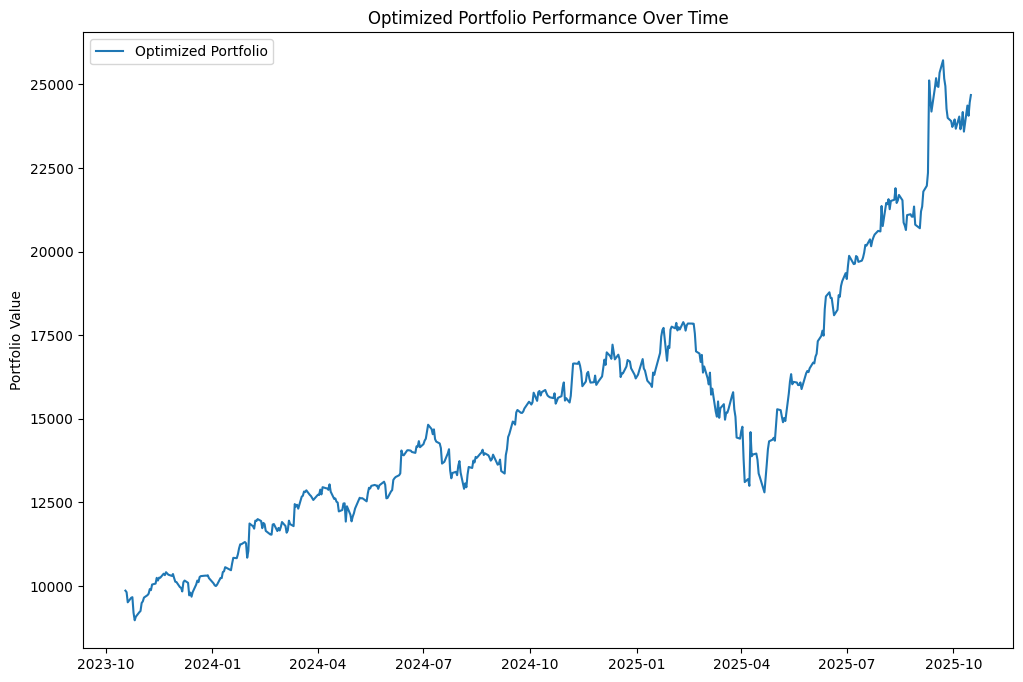

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(portfolio_value, label='Optimized Portfolio')
plt.title('Optimized Portfolio Performance Over Time')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

## Equal-weighted portfolio vs Optimized portfolio

In [45]:
# Equal-Weighted Portfolio Metrics

equal_cumulative_return = cumulative_return
equal_mean_daily_return = mean_daily_return
equal_std_daily_return = std_daily_return
equal_sharpe_ratio = sharpe_ratio_annualized
equal_annual_return = equal_mean_daily_return * 252
equal_annual_volatility = equal_std_daily_return * np.sqrt(252)


In [46]:
# Optimized Portfolio Metrics

opt_cumulative_return = cumulative_return_opt
opt_annual_return = opt_return
opt_annual_volatility = opt_volatility
opt_sharpe_ratio = opt_sharpe


In [47]:
# Create Comparison Table

comparison = pd.DataFrame({
    'Metric': ['Cumulative Return', 'Expected Annual Return', 'Annual Volatility', 'Sharpe Ratio'],
    'Equal-Weighted': [
        round(equal_cumulative_return * 100, 2),
        round(equal_annual_return * 100, 2),
        round(equal_annual_volatility * 100, 2),
        round(equal_sharpe_ratio, 4)
    ],
    'Optimized': [
        round(opt_cumulative_return * 100, 2),
        round(opt_annual_return * 100, 2),
        round(opt_annual_volatility * 100, 2),
        round(opt_sharpe_ratio, 4)
    ]
})

print(comparison)

                   Metric  Equal-Weighted  Optimized
0       Cumulative Return        131.9300   150.2600
1  Expected Annual Return         46.5800    49.6500
2       Annual Volatility         29.2600    29.0800
3            Sharpe Ratio          1.4209     1.7075


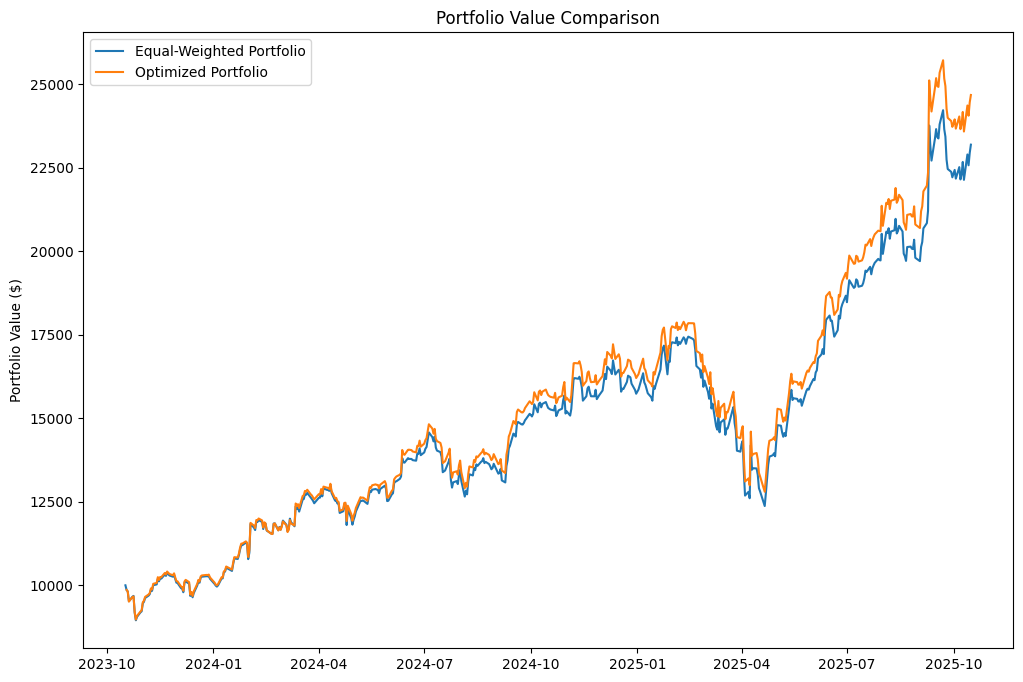

In [48]:
# Visualize Portfolio Value Over Time

plt.figure(figsize=(12, 8))
plt.plot(position_values.index, position_values['Total'], label='Equal-Weighted Portfolio')
plt.plot(portfolio_value.index, portfolio_value, label='Optimized Portfolio')
plt.title('Portfolio Value Comparison')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


- The optimized portfolio delivers higher returns but very close to the equal-weighted portfolio because the stocks are stable high performers
- Its Sharpe ratio indicates better risk-adjusted performance.
- The equal-weighted portfolio is more stable and diversified.